In [1]:
from knnClassifier import knnClassifier
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from collections import defaultdict
from sklearn.metrics import confusion_matrix

In [4]:
df_in = pd.read_csv(r'datasets/train_in.csv',header=None, skiprows=1, usecols=[1])
X = [val for sublist in df_in.values.tolist() for val in sublist]

df_out = pd.read_csv(r'datasets/train_out.csv',header=None, skiprows=1, usecols=[1])
y = [val for sublist in df_out.values.tolist() for val in sublist]
# due to the large size of the dataset we simply use 20,000 examples to test features. 
# We don't have the resources to test on all 85K

le = preprocessing.LabelEncoder()
y =le.fit_transform(y)
index_train = 1000
index_validate_end = int(len(X))

tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words='english', ngram_range=(1,2), sublinear_tf=True) 
# tfidf on the whole space train and validate set
tfidf = tfidf_vectorizer.fit_transform(X[0:index_validate_end])
tfidf = tfidf.toarray()

print "starting split"
my_classifier = knnClassifier()
my_classifier.fit(tfidf[0:index_train], y[0:index_train])
predictions = my_classifier.predict(tfidf[index_train:index_validate_end],k = 15)
score = accuracy_score(y[index_train:index_validate_end],predictions)
cnf_matrix = confusion_matrix(y[index_train:index_validate_end], predictions)
print score
print cnf_matrix
print "done"

starting split
0.865275405143
[[11772   775   271   852]
 [  462 12039   134   188]
 [  748   427  7023   492]
 [ 1008   292   187  6648]]
done


In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
# this code was found on http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
# thanks scikit for making our project look pretty
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/Users/RyanSampana/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Confusion matrix, without normalization
[[11772   775   271   852]
 [  462 12039   134   188]
 [  748   427  7023   492]
 [ 1008   292   187  6648]]


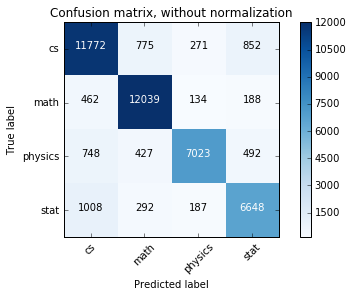

In [7]:
class_names = list(le.classes_)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.savefig('cnfKNNWhole.pdf')

Lets try and use tfidf on the whole abstract space available, with both the set that is labeled and unlabeld. Then lets test how our classifier does with 1000 train and predict 3000 abstracts in the labeled set.

In [ ]:
df_in = pd.read_csv(r'datasets/train_in.csv',header=None, skiprows=1, usecols=[1])
X = [val for sublist in df_in.values.tolist() for val in sublist]

df_out = pd.read_csv(r'datasets/train_out.csv',header=None, skiprows=1, usecols=[1])
y = [val for sublist in df_out.values.tolist() for val in sublist]
# due to the large size of the dataset we simply use 20,000 examples to test features. 
# We don't have the resources to test on all 85K

df_kaggle = pd.read_csv(r'datasets/test_in.csv',header=None, skiprows=1, usecols=[1])
kaggle = [val for sublist in df_kaggle.values.tolist() for val in sublist]

BigCorpus = np.concatenate((X,kaggle),axis=0)

le = preprocessing.LabelEncoder()
y =le.fit_transform(y)
index_train = 1000
index_validate_end = 3000

tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words='english', ngram_range=(1,2), sublinear_tf=True) 
# tfidf on the whole space train and validate set
tfidf = tfidf_vectorizer.fit_transform(BigCorpus)
tfidf = tfidf.toarray()

print "done tfidf tings"

# notice that our idicies allow us to stay within the space of documents that we have labels for
print "starting split"
my_classifier = knnClassifier()
my_classifier.fit(tfidf[0:index_train], y[0:index_train])
predictions = my_classifier.predict(tfidf[index_train:index_validate_end],k = 15)
print accuracy_score(y[index_train:index_validate_end],predictions)
print "done"

In [ ]:
df_in = pd.read_csv(r'datasets/train_in.csv',header=None, skiprows=1, usecols=[1])
X = [val for sublist in df_in.values.tolist() for val in sublist]

df_out = pd.read_csv(r'datasets/train_out.csv',header=None, skiprows=1, usecols=[1])
y = [val for sublist in df_out.values.tolist() for val in sublist]
# due to the large size of the dataset we simply use 20,000 examples to test features. 
# We don't have the resources to test on all 85K

df_kaggle = pd.read_csv(r'datasets/test_in.csv',header=None, skiprows=1, usecols=[1])
kaggle = [val for sublist in df_kaggle.values.tolist() for val in sublist]

BigCorpus = np.concatenate((X,kaggle),axis=0)

le = preprocessing.LabelEncoder()
y =le.fit_transform(y)
index_train = 1000
index_validate_end = len(X)

tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words='english', ngram_range=(1,2), sublinear_tf=True) 
# tfidf on the whole space train and validate set
tfidf = tfidf_vectorizer.fit_transform(BigCorpus)
tfidf = tfidf.toarray()

print "done tfidf tings"

# notice that our idicies allow us to stay within the space of documents that we have labels for
print "starting split"
my_classifier = knnClassifier()
my_classifier.fit(tfidf[0:index_train], y[0:index_train])
predictions = my_classifier.predict(tfidf[index_train:index_validate_end],k = 15)
print accuracy_score(y[index_train:index_validate_end],predictions)
print "done"

IMPROVEMENT!!!! But I doesn't quite hit the mark because our other classifiers are doing a lot better. Probably going to use this in the ensemble 